In [1]:
ls

Meta Data - NLP for SDoH.xlsx
Meta Data- SDoH and health outcomes .xlsx
Plot.ipynb


In [226]:
NLP_SDoH = pd.read_excel('./Meta Data - NLP for SDoH-for plot.xlsx')

In [227]:
len(NLP_SDoH)

36

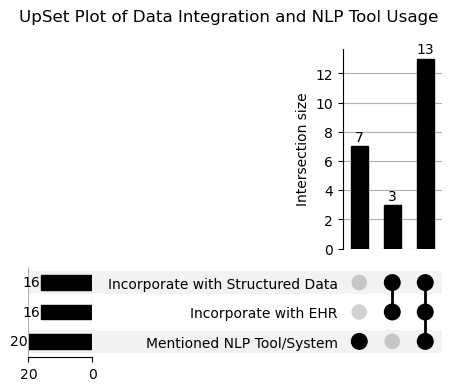

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet

# Sample data based on the provided structure
data = {
    'Incorporate with EHR': [True, True, True, False, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, False, True, False, True, False, False, True, False, False],
    'Incorporate with Structured Data': [True, True, True, False, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, False, True, False, True, False, False, True, False, False],
    'NLP Tool/System Used': [False, True, False, False, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to UpSet data format
from upsetplot import from_contents
upset_data = from_contents({
    'Incorporate with EHR': df[df['Incorporate with EHR']].index.tolist(),
    'Incorporate with Structured Data': df[df['Incorporate with Structured Data']].index.tolist(),
    'Mentioned NLP Tool/System': df[df['NLP Tool/System Used']].index.tolist()
})

# Create an UpSet plot
upset = UpSet(upset_data, show_counts=True)
upset.plot()
plt.suptitle('UpSet Plot of Data Integration and NLP Tool Usage')
plt.show()


In [228]:

data_expanded = NLP_SDoH.to_dict(orient='records')

In [229]:
data_expanded

[{'EndNote_ID': 203,
  'PubMed_ID': 32131117,
  'TItle': 'Detecting Social and Behavioral Determinants of Health with Structured and Free-Text Clinical Data',
  'TItle.1': 'Detecting Social and Behavioral Determinants of Health with Structured and Free-Text Clinical Data',
  'Approach1': 'Combination of machine learning and NLP techniques',
  'Supervised Deep Learning': 'No',
  'Rule-based Learning': 'No',
  'BERT-based': 'No',
  'Supervised Machine Learning': 'Yes',
  'features': 'Bag-of-words, TF-IDF weights, structured EHR data',
  'Accuracy(performance)': 'Variable; e.g., LGBT status F1 = 82.7, IV drug use F1 = 28.5',
  'Incorporate with EHR': 'Yes',
  'NLP Tool/System': 'Not specified',
  'Data Source 1': 'Columbia University Medical Center',
  'Data Source 2': nan,
  'Data Source 3': nan},
 {'EndNote_ID': 440,
  'PubMed_ID': 30815082,
  'TItle': 'Towards the Inference of Social and Behavioral Determinants of Sexual Health: Development of a Gold-Standard Corpus with Semi-Supervise

In [230]:

# Convert the list of dictionaries to a DataFrame
df_expanded = pd.DataFrame(data_expanded)

# Function to create binary columns for categorical features
def create_binary_columns(df, column_name):
    unique_values = set(sum(df[column_name].apply(lambda x: x if isinstance(x, list) else [x]).tolist(), []))
    for value in unique_values:
        df[value] = df[column_name].apply(lambda x: 1 if value in x else 0)

for column in df_expanded.columns:

    df_expanded[column] = df_expanded[column].apply(lambda x: [x] if not isinstance(x, list) else x)

# Ensure every element in the column is a list
# df[column_name] = df[column_name].apply(lambda x: [x] if not isinstance(x, list) else x)

    # Now, create binary columns for unique values
    unique_values = set(sum(df_expanded[column].tolist(), []))  # Flatten the list of lists to get unique values
    for value in unique_values:
        df_expanded[value] = df_expanded[column].apply(lambda x: 1 if value in x else 0)

# Create binary columns for 'Approach', 'Incorporate_with_EHR', 'Institution', and 'Features'
create_binary_columns(df_expanded, 'Approach1')
create_binary_columns(df_expanded, 'Data Source 1')
create_binary_columns(df_expanded, 'features')
# df_expanded['Incorporate with EHR'] = df_expanded['Incorporate with EHR'].apply(lambda x: 1 if x == "Yes" else 0)

# Drop the original columns to avoid redundancy
df_expanded.drop(['Approach1', 'Data Source 1', 'features'], axis=1, inplace=True)

df_expanded.head()  # Display the first few rows of the transformed dataset


/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_6384/3580126438.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expanded[value] = df_expanded[column].apply(lambda x: 1 if value in x else 0)
/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_6384/3580126438.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expanded[value] = df_expanded[column].apply(lambda x: 1 if value in x else 0)
/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_6384/3580126438.py:20: PerformanceWarning: DataFrame is h

,EndNote_ID,PubMed_ID,TItle,TItle.1,Supervised Deep Learning,Rule-based Learning,BERT-based,Supervised Machine Learning,Accuracy(performance),Incorporate with EHR,...,University of Washington Medicine,University of Utah Health Sciences Center,VA Corporate Data Warehouse,University of North Carolina Health System,n2c2 Track 2 competition dataset,Vanderbilt University Medical Center Synthetic Derivative database,PubMed,UW Harborview Medical Center,The study analyzes representation of occupation information in free-text clinical notes from multiple sources.,LitCOVID
0,[203],[32131117],[Detecting Social and Behavioral Determinants ...,[Detecting Social and Behavioral Determinants ...,[No],[No],[No],[Yes],"[Variable; e.g., LGBT status F1 = 82.7, IV dru...",[Yes],...,0,0,0,0,0,0,0,0,0,0
1,[440],[30815082],[Towards the Inference of Social and Behaviora...,[Towards the Inference of Social and Behaviora...,[No],[No],[No],[Yes],[Poor performance on individual SBDH labels],[Yes],...,0,0,0,0,0,0,0,0,0,0
2,[201],[35042703],[Simplified Data Science Approach to Extract S...,[Simplified data science approach to extract s...,[No],[No],[No],[Yes],"[Housing: 92.18%, Tobacco: 84.68%, Alcohol: 82...",[Yes],...,0,0,0,0,0,0,0,0,0,0
3,[176],[35005628],[Mimic-Sbdh: A Dataset for Social and Behavior...,[MIMIC-SBDH: A Dataset for Social and Behavior...,[Yes],[No],[Yes],[Yes],[F1 score range from 0.69 (Drug Use) to 0.96 (...,[No],...,0,0,0,0,0,0,0,0,0,0
4,[704],[36652267],[Evaluation of a Model to Target High-Risk Psy...,[Evaluation of a Model to Target High-Risk Psy...,[No],[No],[No],[Yes],"[AUROC 0.747-0.780, net benefit at multiple th...",[Yes],...,0,0,0,0,0,0,0,0,0,0


In [231]:
df_expanded.to_csv("NLP_for_SDOH_expanded.csv")

In [232]:
df_expanded['Incorporate with EHR'].value_counts()

Incorporate with EHR
[Yes]    22
[No]     14
Name: count, dtype: int64

In [233]:
df_expanded['Supervised Machine Learning'].value_counts()

Supervised Machine Learning
[No]     24
[Yes]    12
Name: count, dtype: int64

In [234]:
# Replace 'Method1', 'Method2', 'Method3' with your actual column names
df_expanded.rename(columns = {'SupervisedLearning': 'Supervised Machine Learning'}, inplace = True)
columns_for_upset = [ 'Supervised Deep Learning',
 'Rule-based Learning',
 'BERT-based',
 'Supervised Machine Learning',
#  'Accuracy(performance)',
 'Incorporate with EHR', ]
df_for_upset = df_expanded[columns_for_upset]
for column in df_for_upset.columns:
    df_for_upset[column] = df_for_upset[column].apply(lambda x: tuple(x) if isinstance(x, list) else x)
# df['your_column_with_lists'] = df['your_column_with_lists'].apply(lambda x: tuple(x) if isinstance(x, list) else x)


/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_6384/3934104502.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_upset[column] = df_for_upset[column].apply(lambda x: tuple(x) if isinstance(x, list) else x)


In [235]:
df_for_upset

,Supervised Deep Learning,Rule-based Learning,BERT-based,Supervised Machine Learning,Incorporate with EHR
0,"(No,)","(No,)","(No,)","(Yes,)","(Yes,)"
1,"(No,)","(No,)","(No,)","(Yes,)","(Yes,)"
2,"(No,)","(No,)","(No,)","(Yes,)","(Yes,)"
3,"(Yes,)","(No,)","(Yes,)","(Yes,)","(No,)"
4,"(No,)","(No,)","(No,)","(Yes,)","(Yes,)"
5,"(Yes,)","(No,)","(No,)","(Yes,)","(Yes,)"
6,"(No,)","(No,)","(No,)","(Yes,)","(No,)"
7,"(No,)","(No,)","(No,)","(Yes,)","(Yes,)"
8,"(No,)","(Yes,)","(No,)","(Yes,)","(No,)"
9,"(No,)","(Yes,)","(No,)","(No,)","(Yes,)"


In [236]:
# Custom function to convert values to boolean
def convert_to_boolean(cell):
    # Handle tuple cases
    if isinstance(cell, tuple):
        if "No" in cell or 0 in cell:
            return False
        else:
            return True
    # Handle scalar cases
    else:
        return bool(cell)

# Apply the custom function to each cell in the DataFrame
df_boolean = df_for_upset.applymap(convert_to_boolean)

df_boolean

/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_6384/3307654945.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_boolean = df_for_upset.applymap(convert_to_boolean)


,Supervised Deep Learning,Rule-based Learning,BERT-based,Supervised Machine Learning,Incorporate with EHR
0,False,False,False,True,True
1,False,False,False,True,True
2,False,False,False,True,True
3,True,False,True,True,False
4,False,False,False,True,True
5,True,False,False,True,True
6,False,False,False,True,False
7,False,False,False,True,True
8,False,True,False,True,False
9,False,True,False,False,True


In [237]:
df_boolean.columns

Index(['Supervised Deep Learning', 'Rule-based Learning', 'BERT-based',
       'Supervised Machine Learning', 'Incorporate with EHR'],
      dtype='object')

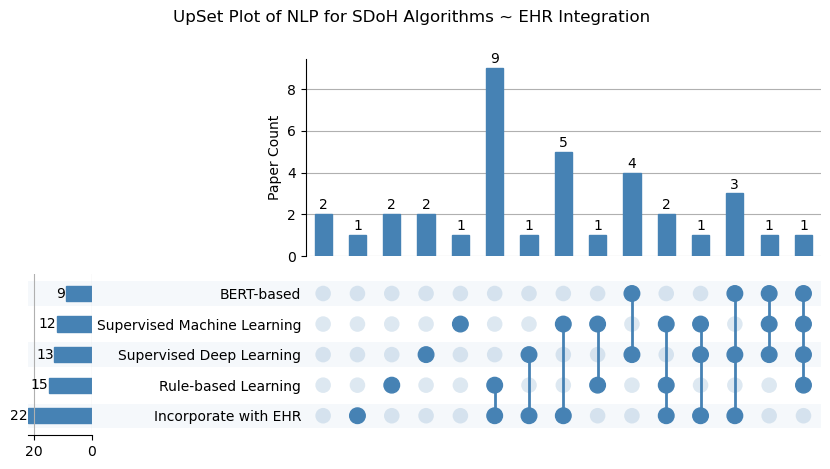

In [238]:
# Create an UpSet plot
# df_for_upset.set_index(columns_for_upset, inplace=True)
df_for_upset = df_boolean.set_index(columns_for_upset)
upset = UpSet(df_for_upset, show_counts=True,facecolor='steelblue')
upset.plot()
plt.suptitle('UpSet Plot of NLP for SDoH Algorithms ~ EHR Integration')
plt.xlabel('category count')  # Change x-axis label
plt.ylabel('Paper Count')  # Change y-axis label 

plt.show()